In [1]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import sin,cos,tan, arctan, sqrt, pi, array, zeros, float16
import pandas as pd

In [2]:
# Metric Definition
# Schwarzschild Metric

def g_tt(r,th):
    return -(1-2*M/r)

def gtt(r,th):
    return 1/g_tt(r,th)

def grr(r,th):
    return 1-2*M/r

def g_rr(r,th):
    return 1/grr(r,th)

def g_th(r,th):
    return r**2

def gth(r,th):
    return 1/g_th(r,th)

def g_pp(r,th):
    return (r**2)*((sin(th))*(sin(th)))

def gpp(r,th):
    return 1/g_pp(r,th)

def drg_rr(r,th):
    return - (2*M)/(r-2*M)**2

def drg_tt(r,th):
    return - 2*M/r**2


In [3]:
# Riemann's tensor components in Schwarzschild

def R_tr(r,th):      # [t r t r]
    return - 2*M/r**3

def R_tth(r,th):     # [t th t th]
    return M*(-2*M + r)/r**2

def R_tp(r,th):      # [t ph t ph]
    return -(M*(2*M - r)*((sin(th))**2)/r**2)

def R_rt(r,th):      # [r t r t]
    return R_tr(r,th)

def R_tht(r,th):     # [th t th t]
    return R_tth(r,th)

def R_pt(r,th):      # [ph t ph t]
    return R_tp(r,th)

def R_rth(r,th):     # [r th r th]
    return M/(2*M -r)

def R_thr(r,th):     # [th r th r]
    return R_rth(r,th)

def R_rp(r,th):      # [r ph r ph]
    return (M*((sin(th))**2))/(2*M - r)

def R_pr(r,th):      # [ph r ph r]
    return R_rp(r,th)

def R_thp(r,th):     # [th ph th ph]
    return 2*M*r*((sin(th))**2)

def R_pth(r,th):     # [ph th ph th]
    return R_thp(r,th)

In [4]:
#Christoffel symbols

def ttr(r,th):
    return (1/(2*g_tt(r,th)))*drg_tt(r,th)

def trt(r,th):
    return (1/(2*g_tt(r,th)))*drg_tt(r,th)

def rtt(r,th):
    return -(1/(2*g_rr(r,th)))*drg_tt(r,th) # INCLUYO UN MENOS QUE HACIA FALTA

def rrr(r,th):
    return (1/(2*g_rr(r,th)))*drg_rr(r,th)

def rthth(r,th):
    return -r/(g_rr(r,th)) # INCLUYO UN MENOS QUE HACIA FALTA

def rpp(r,th):
    return -(r*((sin(th))**2))/(g_rr(r,th)) # INCLUYO UN MENOS QUE HACIA FALTA

def thrth(r,th):
    return 1/r

def ththr(r,th):
    return 1/r

#def ththp(r,th):
#    return - (sin(th))*(cos(th)) # NO EXISTE ESTA COMPONENTE

def thpp(r,th):
    return - (sin(th))*(cos(th))

def ppr(r,th):
    return 1/r

def prp(r,th):
    return 1/r

def ppth (r,th):
    return 1/(tan(th))

def pthp (r,th):
    return 1/(tan(th))

In [5]:
# Initial conditions probe
# Constants values

M = 1
mu = 1

J = 4
E = 0.94738162
S = 0.5
r = 3.72
#t = 1
p = 0.01
angulo = 1.5707963267948966
th = angulo
alp = angulo
cot= cos(th)/sin(th)

#Initial conditions of position

#t0 = t
r0 = r
th0=th
p0 = p

#Initial components of momentum

#pt0 = g_tt(r,th)*(E + ((J*math.cos(alp)*(drg_tt(r,th))*S)/(2*(sqrt(- (g_tt(r,th))*(grr(r,th))*((J**2)*((math.sin(alp))**2)+((r)**2)*(mu)**2))))))*( 1/(r*S**2*drg_tt(r,th)/(2*g_tt(r,th)*grr(r,th)*(J**2*(sin(alp)**2) + r**2*mu**2)) - 1) )

p_t0 = (E + ((J*cos(alp)*(drg_tt(r,th))*S)/(2*(sqrt(- (g_tt(r,th))*(grr(r,th))*((J**2)*((sin(alp))**2)+((r)**2)*(mu)**2))))))*(1/(((r))*((S)**2)*(drg_tt(r,th))/(2*g_tt(r,th)*grr(r,th)*((J**2)*((np.sin(alp))**2)+((r)**2)*(mu)**2))-1)) # ELIMINÉ VARIOS PARENTESIS INNECESARIOS

pt0 = gtt(r,th)*p_t0        # SE SUBE EL INDICE CON LA COMPONENTE ADECUADA DE LA METRICA 


Srth0 = (sin(alp)*S*(p_t0)/(sqrt((-g_tt(r,th))*(g_rr(r,th))*(J**2*((sin(alp))**2) + (r**2)*(mu**2)))))

Spr0 = (cos(alp)*S*(p_t0))/sqrt((-g_tt(r,th))*(g_rr(r,th))*(J**2*((sin(alp)**2) + (r**2)*(mu**2))))

pth0 = - (gth(r,th))*(r)*(Srth0)

p_th0 = - (r)*(Srth0)

pp0 = (gpp(r,th))*((r)*(Spr0) + J)

p_p0 = ((r)*(Spr0) + J)

p_r0 = math.sqrt(abs((-(1/grr(r,th))*(((mu)**2) + (gtt(r,th))*((p_t0)**2) + (((p_th0)**2)+((p_p0)**2))/((r)**2)))))

pr0 = (grr(r,th))* p_r0

#Initial components of spin

Sthp0 = (J/(r*r))*cot

Spth0 = - Sthp0

Srp0 = (math.cos(alp)*S*(p_t0))/sqrt((-g_tt(r,th))*(g_rr(r,th))*(J**2*((math.sin(alp)**2) + (r**2)*(mu**2))))

Sthr0 = - (math.sin(alp)*S*(p_t0))/(sqrt((-g_tt(r,th))*(g_rr(r,th))*(J**2*((math.sin(alp))**2) + (r**2)*(mu**2))))

Str0 = (- 1/(p_t0))*(r*((Srth0)**2) + r*((Spr0)**2) + J*(Spr0))

Srt0 = - Str0

Stth0 = ((p_r0)/(p_t0))*(Srth0)

Stht0 = - Stth0

Stp0 = ((p_r0)/(p_t0))*(Spr0)

Spt0 = - Stp0


In [6]:
# Constants values
# Estos valores son constantes, dependen de las expresiones para el spin anteriores

def a (r,th):
    term1 = -(Str0)*(R_rt(r,th))*(pt0)*(Str0) + (Str0)*(R_rth(r,th))*(pth0)*(Srth0) + (Str0)*(R_rp(r,th))*(pp0)*(Srp0)
    term2 = -(Stth0)*(R_tht(r,th))*(pt0)*(Stth0) - (Stth0)*(R_thr(r,th))*(pr0)*(Srth0) + (Stth0)*(R_thp(r,th))*(pp0)*(Sthp0)
    term3 = -(Stp0)*(R_pt(r,th))*(pt0)*(Stp0) - (Stp0)*(R_pr(r,th))*(pr0)*(Srp0) - (Stp0)*(R_pth(r,th))*(pth0)*(Sthp0)
    return term1 + term2 +  term3

def b (r,th):
    term1 = -(Str0)*(R_tr(r,th))*(pr0)*(Str0) - (Str0)*(R_tth(r,th))*(pth0)*(Stth0) - (Str0)*(R_tp(r,th))*(pp0)*(Stp0)
    term2 = -(Srth0)*(R_tht(r,th))*(pt0)*(Stth0) - (Srth0)*(R_thr(r,th))*(pr0)*(Srth0) + (Srth0)*(R_thp(r,th))*(pp0)*(Sthp0)
    term3 = -(Srp0)*(R_pt(r,th))*(pt0)*(Stp0) - (Srp0)*(R_pr(r,th))*(pr0)*(Srp0) - (Srp0)*(R_pth(r,th))*(pth0)*(Sthp0)
    return term1 + term2 + term3

def c (r,th):
    term1 = -(Stth0)*(R_tr(r,th))*(pr0)*(Str0) - (Stth0)*(R_tth(r,th))*(pth0)*(Stth0) - (Stth0)*(R_tp(r,th))*(pp0)*(Stp0)
    term2 = (Srth0)*(R_rt(r,th))*(pt0)*(Str0) - (Srth0)*(R_rth(r,th))*(pth0)*(Srth0) - (Srth0)*(R_rp(r,th))*(pp0)*(Srp0)
    term3 = -(Sthp0)*(R_pt(r,th))*(pt0)*(Stp0) - (Sthp0)*(R_pr(r,th))*(pr0)*(Srp0) - (Sthp0)*(R_pth(r,th))*(pth0)*(Sthp0)
    return term1 + term2 + term3

def d (r,th):
    term1 = -(Stp0)*(R_tr(r,th))*(pr0)*(Str0) - (Stp0)*(R_tth(r,th))*(pth0)*(Stth0) - (Stp0)*(R_tp(r,th))*(pp0)*(Stp0)
    term2 = (Srp0)*(R_rt(r,th))*(pt0)*(Str0) - (Srp0)*(R_rth(r,th))*(pth0)*(Srth0) - (Srp0)*(R_rp(r,th))*(pp0)*(Srp0)
    term3 = (Sthp0)*(R_tht(r,th))*(pt0)*(Stth0) + (Sthp0)*(R_thr(r,th))*(pr0)*(Srth0) - (Sthp0)*(R_thp(r,th))*(pp0)*(Sthp0)
    return term1 + term2 + term3

def A (r,th):
    return g_tt(r, th) * ((a(r,th))**2) + g_rr(r, th) * ((b(r,th))**2) + g_th(r, th) * ((c(r,th))**2) + g_pp(r, th) * ((d(r,th))**2)


In [7]:
# Constants
# Estas expresiones describen el spín en cada punto, luego de la condición inicial, estas expresiones son necesarias para las que se quieren solucionar con el integrador

def tr(r,th):
    term1 = 1/((mu)**2)
    term2 = (R_tr(r,th))*(Str0**2) + (R_tth(r,th))*(Stth0**2)+(R_tp(r,th))*(Stp0**2)
    term3 = R_rth(r,th)*(Srth0**2) + (R_rp(r,th))*(Srp0**2)
    term4 = R_thp(r,th)*(Sthp0**2)
    return 1 + term1*(term2 + term3 + term4)

def N (r,th):
    term5 = (A (r,th))/(4*tr(r,th))
    term6 = ((mu)**3)*((mu)**6 - term5)
    return ((mu)**3)*(math.sqrt(abs(term6)))


In [8]:
#Velocity expressions. Van cambiando a lo largo de la trayectoria, por ello, deben ser funciones.

def dxtdt (r, th):
      return  (N (r, th) / mu) * ((pt0) + (1 / (2 * ((mu)**2) * (tr(r, th)))) * (a (r, th)))

def dxrdt (r, th):
      return (N(r, th) / mu) * ((pr0) + (1 / (2 * ((mu)**2) * tr(r, th))) * b(r, th))

def dxthdt (r, th):
      return (N(r, th) / mu) * ((pth0) + (1 / (2 * ((mu)**2) * tr(r, th))) * c(r, th))

def dxpdt (r, th):
      return (N(r, th) / mu) * ((pp0) + (1 / (2 * ((mu)**2) * tr(r, th))) * c(r, th))


In [9]:


t0 = 1
r0=3.8
angulo = 1.5707963267948966
th0 = angulo
p0 = 0

def integrate_BulirschStoeir(F, x, y, xStop, tol):
    def midpoint(F, x, y, xStop, nSteps):
        h = (xStop - x) / nSteps
        y0 = y
        y1 = y0 + h * F(x, y0)
        for i in range(nSteps - 1):
            x = x + h
            y2 = y0 + 2.0 * h * F(x, y1)
            y0 = y1
            y1 = y2
        return np.array([0.5 * (y1 + y0 + h * F(x, y2))])

    def richardson(r, k):
        for j in range(k - 1, 0, -1):
            const = (k / (k - 1.0)) ** (2.0 * (k - j))
            r[j] = (const * r[j + 1] - r[j]) / (const - 1.0)
        return

    kMax = 51
    n = len(y)
    r = np.zeros((kMax, n), dtype=float)
    nSteps = 2
    r[1] = midpoint(F, x, y, xStop, nSteps)
    r_old = r[1].copy()

    for k in range(2, kMax):
        nSteps = 2 * k
        r[k] = midpoint(F, x, y, xStop, nSteps)
        richardson(r, k)
        e = np.sqrt(np.sum((r[1] - r_old) ** 2) / n)
        if e < tol:
            return r[1]
        r_old = r[1].copy()
    print("Midpoint method did not converge")
# Bulirsch-Stoer Algorithm:-
''' X, Y = bulStoer(F, x, y, xStop, H, tol=1.0e-6).
    Simplified Bulirsch-Stoer method for solving the
    initial value problem {y}’ = {F(x,{y})}, where {y} = {y[0],y[1],...y[n-1]}
    x, y = initial conditions
    xStop = terminal value of x
    H = increment of x at which results are stored
    F = user-supplied function that returns the array F(x,y) = {y’[0],y’[1],...,y’[n-1]} '''
from numpy import array
def bulStoer(F, x, y, xStop, H, tol=1.0e-6):
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    while x < xStop:
        H = min(H,xStop - x)
        y = integrate_BulirschStoeir(F, x, y, x + H, tol)   # Midpoint method
        x = x + H
        X.append(x)
        Y.append(y)
    return array(X), array(Y)
def printSoln(X, Y, freq):
    def printHead(n):
        print(" x  ",end=" ") ## end=" " here
        for i in range(n):
            print("      y[",i,"] ",end=" ") ## end=" " here
        print()
    def printLine(x, y, n):
        print('{:13.4e}'.format(x), end=' ') ## end=" " here
        for i in range(n):
            print('{:13.4e}'.format(y[i]), end=' ') ## end=" " here
        print()
    m = Y.shape[0]
    try: n = Y.shape[1]
    except Exception: n = 1
    if freq == 0: freq = m
    printHead(n)
    for i in range(0,m,freq):
        printLine(X[i], Y[i], n)
    if i != m - 1: printLine(X[m - 1], Y[m - 1], n)
from numpy import array, zeros

def F(x, y):

    dtdt, drdt, dthdt, dpdt, dptdt, dprdt, dpthdt, dppdt, dStrdt, dStthdt, dStpdt, dSrthdt, dSrpdt, dSthpdt = y

    F = zeros(len(y))

    dtdt = t0
    drdt = r0
    dthdt = th0
    dpdt = p0

    dptdt = - (ttr(r, th)) * ((dxtdt(r, th)) * pr0) - (ttr(r, th)) * ((dxrdt(r, th)) * pt0) - (R_tr(r, th)) * (dxrdt(r, th)) * (Str0) - (R_tth(r, th)) * (dxthdt(r, th)) * (Stth0) - (R_tp(r, th)) * (dxpdt(r, th)) * (Stp0)
    dprdt = - (rtt(r, th)) * ((dxtdt(r, th)) * pt0) - (rrr(r, th)) * ((dxrdt(r, th)) * pr0) - (rthth(r, th)) * ((dxthdt(r, th)) * pth0) - (rpp(r, th)) * ((dxpdt(r, th)) * pp0) + (R_rt(r, th)) * (dxtdt(r, th)) * (Str0) - (R_rth(r, th)) * (dxthdt(r, th)) * (Srth0) - (R_rp(r, th)) * (dxpdt(r, th)) * (Srp0)
    dpthdt = - (thrth(r, th)) * ((dxrdt(r, th)) * pth0) - (thrth(r, th)) * ((dxthdt(r, th)) * pr0) - (thpp(r, th)) * ((dxpdt(r, th)) * pp0) + (R_tht(r, th)) * (dxtdt(r, th)) * (Stth0) + (R_thr(r, th)) * (dxrdt(r, th)) * (Srth0) - (R_thp(r, th)) * (dxpdt(r, th)) * (Sthp0)
    dppdt = - ((prp(r, th)) * ((dxrdt(r, th)) * pp0)) - ((prp(r, th)) * ((dxpdt(r, th)) * pr0)) - ((pthp(r, th)) * ((dxthdt(r, th)) * pp0)) - ((pthp(r, th)) * ((dxpdt(r, th)) * pth0)) + (R_pt(r, th)) * (dxtdt(r, th)) * (Stp0) + (R_pr(r, th)) * (dxrdt(r, th)) * (Srp0) + (R_pth(r, th)) * (dxthdt(r, th)) * (Sthp0)

    dStrdt = - (ttr(r, th)) * ((dxrdt(r, th)) * Str0) - (rrr(r, th)) * ((dxrdt(r, th)) * Str0) - (rthth(r, th)) * ((dxthdt(r, th)) * Stth0) - (rpp(r, th)) * ((dxpdt(r, th)) * Stp0) + ((pt0) * (dxrdt(r, th))) - ((pr0) * ((dxtdt(r, th))))
    dStthdt = - (ttr(r, th)) * ((dxtdt(r, th)) * Srth0) - (ttr(r, th)) * ((dxrdt(r, th)) * Stth0) - (thrth(r, th)) * ((dxrdt(r, th)) * Stth0) - (thrth(r, th)) * ((dxthdt(r, th)) * Str0) - (thpp(r, th)) * ((dxpdt(r, th)) * Stp0) + ((pt0) * (dxthdt(r, th))) - ((pth0) * ((dxtdt(r, th))))
    dStpdt = - (ttr(r, th)) * ((dxtdt(r, th)) * Srp0) - (ttr(r, th)) * ((dxrdt(r, th)) * Stp0) - (prp(r, th)) * ((dxrdt(r, th)) * Stp0) - (prp(r, th)) * ((dxpdt(r, th)) * Str0) - (pthp(r, th)) * ((dxthdt(r, th)) * Stp0) - (pthp(r, th)) * ((dxpdt(r, th)) * Stp0) + ((pt0) * (dxpdt(r, th))) - ((pp0) * ((dxtdt(r, th))))
    dSrthdt = - (rtt(r, th)) * ((dxtdt(r, th)) * Stth0) - (rrr(r, th)) * ((dxrdt(r, th)) * Srth0) - (rpp(r, th)) * ((dxpdt(r, th)) * Spth0) - (thrth(r, th)) * ((dxrdt(r, th)) * Srth0) - (thpp(r, th)) * ((dxpdt(r, th)) * Srp0) + ((pr0) * (dxthdt(r, th))) - ((pth0) * ((dxrdt(r, th))))
    dSrpdt = - (rtt(r, th)) * ((dxtdt(r, th)) * Stp0) - (rrr(r, th)) * ((dxrdt(r, th)) * Srp0) - (rthth(r, th)) * ((dxthdt(r, th)) * Sthp0) - (prp(r, th)) * ((dxrdt(r, th)) * Srp0) - (pthp(r, th)) * ((dxthdt(r, th)) * Srp0) - (pthp(r, th)) * ((dxpdt(r, th)) * Srth0) + ((pr0)) * (dxpdt(r, th)) - ((pp0) * ((dxrdt(r, th))))
    dSthpdt = - (thrth(r, th)) * ((dxrdt(r, th)) * Sthp0) - (thrth(r, th)) * ((dxthdt(r, th)) * Srp0) - (prp(r, th)) * ((dxrdt(r, th)) * Sthp0) - (prp(r, th)) * ((dxpdt(r, th)) * Sthr0) - (pthp(r, th)) * ((dxthdt(r, th)) * Sthp0) + ((pth0) * (dxpdt(r, th))) - ((pp0) * ((dxthdt(r, th))))

    return array([dtdt, drdt, dthdt, dpdt, dptdt, dprdt, dpthdt, dppdt, dStrdt, dStthdt, dStpdt, dSrthdt, dSrpdt, dSthpdt], float)

x = 0.0
xStop = 100.0
H = 0.1
y = array([t0, r0, th0, p0, pt0, pr0, pth0, pp0, Str0, Stth0, Stp0, Srth0, Srp0, Sthp0])
freq = 1

X, Y = bulStoer(F, x, y, xStop, H)
Y = np.array(Y)
printSoln(X, Y, freq)
print(type(X))
print(np.shape(X))

 x         y[ 0 ]        y[ 1 ]        y[ 2 ]        y[ 3 ]        y[ 4 ]        y[ 5 ]        y[ 6 ]        y[ 7 ]        y[ 8 ]        y[ 9 ]        y[ 10 ]        y[ 11 ]        y[ 12 ]        y[ 13 ]  
   0.0000e+00    1.0000e+00    3.8000e+00    1.5708e+00    0.0000e+00    2.0708e+00    2.8941e-01    2.3559e-02    2.8905e-01    2.9842e-02    5.7294e-02    1.2437e-18   -8.7641e-02   -1.9025e-18    1.7699e-17 
   1.0000e-01    1.1000e+00    4.1800e+00    1.7279e+00    0.0000e+00    2.0521e+00    2.9052e-01    2.6146e-02    2.8454e-01    3.0368e-02    5.9438e-02   -1.7523e-04   -8.7749e-02   -3.2858e-05   -6.8570e-04 
   2.0000e-01    1.2000e+00    4.5600e+00    1.8850e+00    0.0000e+00    2.0333e+00    2.9162e-01    2.8733e-02    2.8003e-01    3.0894e-02    6.1582e-02   -3.5047e-04   -8.7857e-02   -6.5715e-05   -1.3714e-03 
   3.0000e-01    1.3000e+00    4.9400e+00    2.0420e+00    0.0000e+00    2.0145e+00    2.9273e-01    3.1320e-02    2.7552e-01    3.1420e-02    6.3726e-02   -5.25

In [10]:
x_new = Y[:, 1] * np.sin(Y[:, 2]) * np.cos(Y[:, 3])
y_new = Y[:, 1] * np.sin(Y[:, 2]) * np.sin(Y[:, 3])
z_new = Y[:, 1] * np.cos(Y[:, 2])

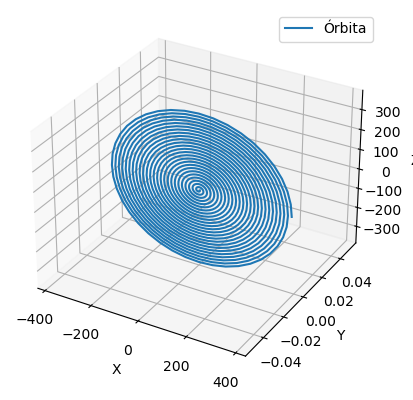

In [11]:
# 3D Graphic
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_new, y_new, z_new, label='Órbita')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Legend
ax.legend()
plt.show()


In [12]:
x_new = Y[:, 1] * np.sin(Y[:, 2]) * np.cos(Y[:, 3])
z_new = Y[:, 1] * np.cos(Y[:, 2])

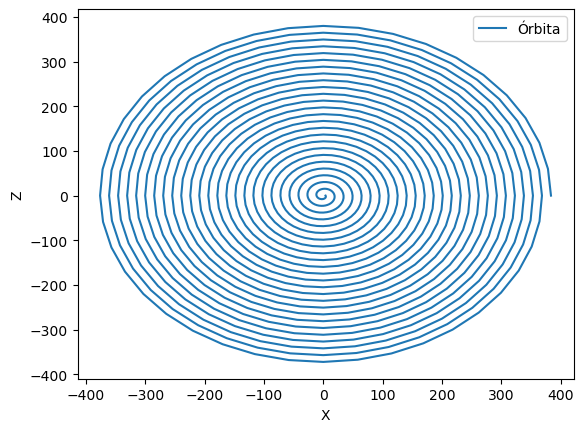

In [13]:
# 2D Graphic (x - z)
plt.plot(x_new, z_new, label='Órbita')

plt.xlabel('X')
plt.ylabel('Z')
plt.legend()

plt.show()

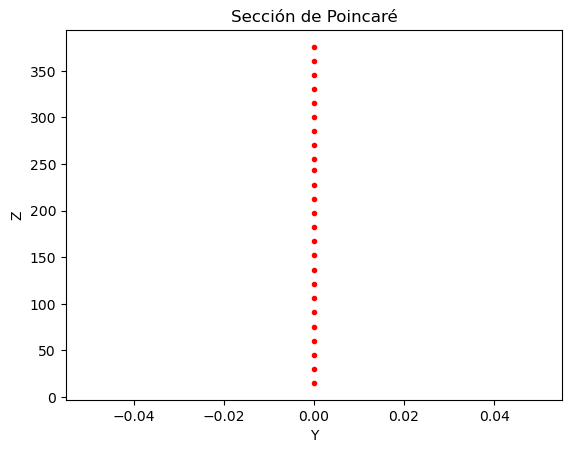

In [14]:
def poincare_section(X, Y, Z, threshold=0):
    indices = []
    for i in range(1, len(X)):
        if X[i - 1] < threshold and X[i] > threshold:
            indices.append(i)
    return indices

# Obtener las coordenadas para la sección de Poincaré
indices = poincare_section(x_new, y_new, z_new, threshold=0)

# Plot de la sección de Poincaré
fig, ax = plt.subplots()
ax.plot(y_new[indices], z_new[indices], 'r.')
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_title('Sección de Poincaré')
plt.show()